In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlclass import MLClass

import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter("ignore", category=FitFailedWarning)

# Regression testing

In [3]:
df = pd.read_csv('Advertising.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
regression_test = MLClass(True, df, 'sales')

In [6]:
print(regression_test.regression_lir())
print(regression_test.regression_ridge())
print(regression_test.regression_lasso())
print(regression_test.regression_elasticnet())
#print(regression_test.regression_svr())

  type  refit time       mae      rmse       r2
0  LiR    0.003003  0.379215  0.541394  0.98953
    type  refit time       mae      rmse        r2
1  Ridge    0.003001  0.384665  0.538107  0.989656
    type  refit time       mae      rmse       r2
2  Lasso    0.003003  0.560537  0.720031  0.98148
         type  refit time       mae      rmse        r2
3  ElasticNet    0.002001  0.555296  0.714276  0.981775


In [7]:
regression_test.ridge_best_model.best_estimator_

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.1, max_iter=5000))])

In [10]:
regression_test.metrics

,type,refit time,mae,rmse,r2
0,LiR,0.002002,0.379215,0.541394,0.989530
1,Ridge,0.002002,0.384665,0.538107,0.989656
2,Lasso,0.004003,0.560537,0.720031,0.981480
3,ElasticNet,0.003003,0.555296,0.714276,0.981775


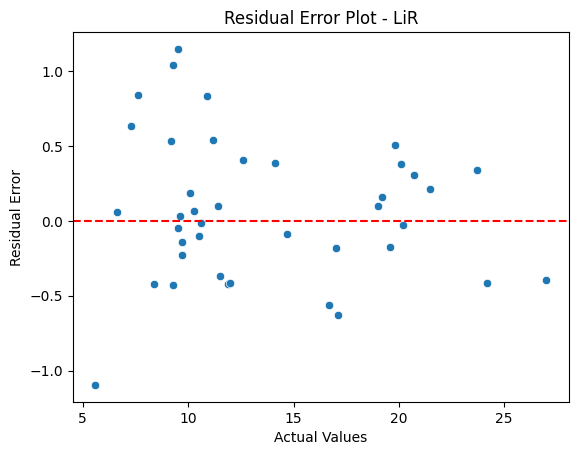

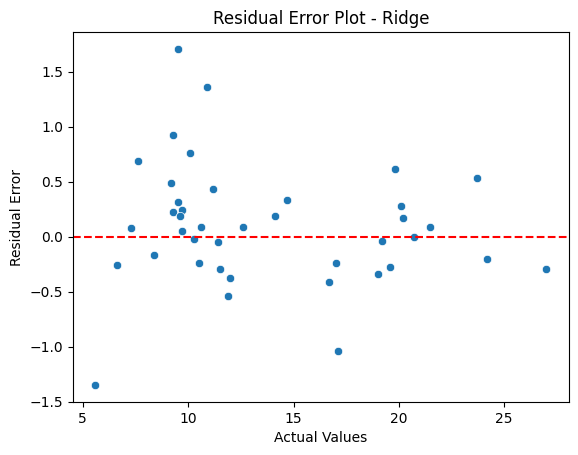

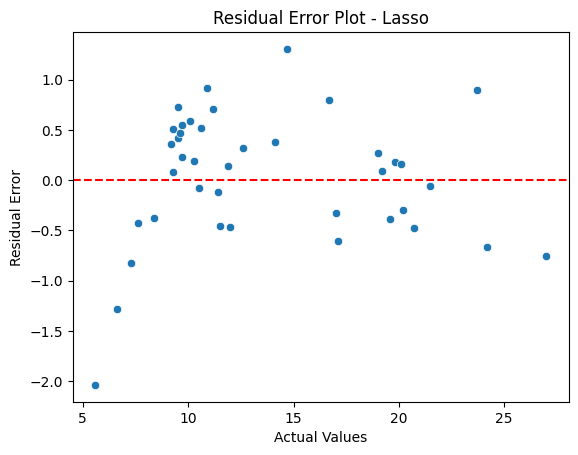

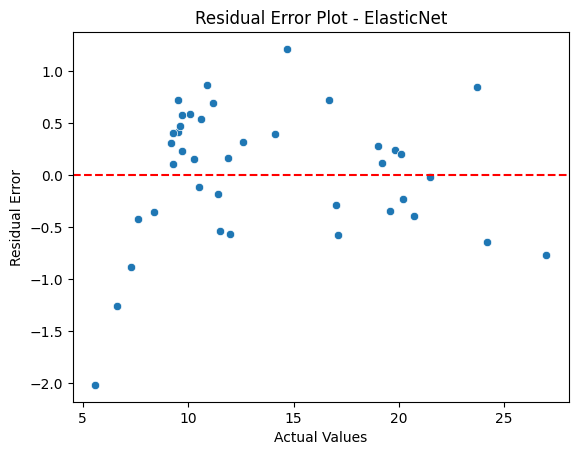

In [7]:
models = ['LiR','Ridge','Lasso','ElasticNet'] #'SVR'
regression_test.regression_plot_resid(models)

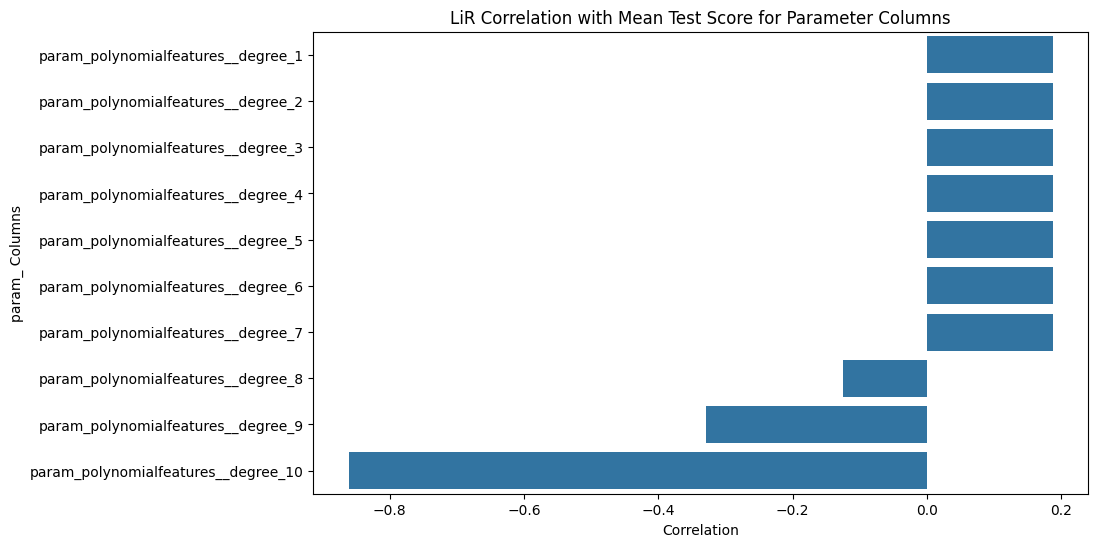

In [8]:
regression_test.corr_w_test_score_plot('LiR')

In [19]:
regression_test.get_best_type()['type'].iloc[0]

'Ridge'

In [10]:
regression_test.get_best_params(models)

[{'Model': 'LiR', 'polynomialfeatures__degree': 4},
 {'Model': 'Ridge', 'polynomialfeatures__degree': 3, 'ridge__alpha': 0.1},
 {'Model': 'Lasso', 'lasso__alpha': 0.1, 'polynomialfeatures__degree': 4},
 {'Model': 'ElasticNet',
  'elasticnet__alpha': 0.1,
  'elasticnet__l1_ratio': 0.95,
  'polynomialfeatures__degree': 4}]

# Classification testing

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
classification_test = MLClass(False, df, 'species', 0.3)

Target variable is multi-class categorical.


In [5]:
#print(classification_test.classification_lor())
print(classification_test.classification_knn())
print(classification_test.classification_svc())

C:\Users\Gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.93272727 0.93272727        nan ...        nan        nan        nan]
  warnings.warn(


K nearest neigbhors report:
              precision    recall  f1-score   support

      setosa       1.00      0.92      0.96        13
  versicolor       0.91      1.00      0.95        20
   virginica       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.97      0.95      0.96        45
weighted avg       0.96      0.96      0.96        45

SVC report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [6]:
classification_test.metrics

,type,refit time,precision,recall,f1 score,accuracy
0,KNN,0.003002,0.969697,0.946581,0.956301,0.955556
1,SVC,0.004005,0.974359,0.983333,0.978120,0.977778


C:\Users\Gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Gabri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


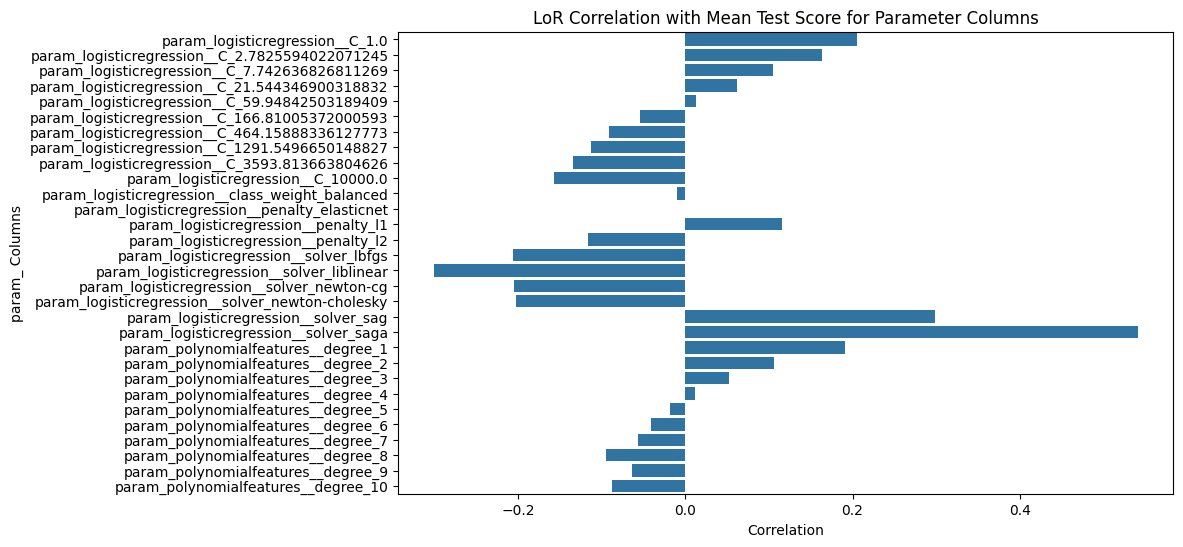

In [17]:
classification_test.corr_w_test_score_plot('KNN','SVC')

In [7]:
models = ['KNN','SVC'] #'LoR'
classification_test.get_best_params(models)

ValueError: Model with name '['KNN', 'SVC']' not found.

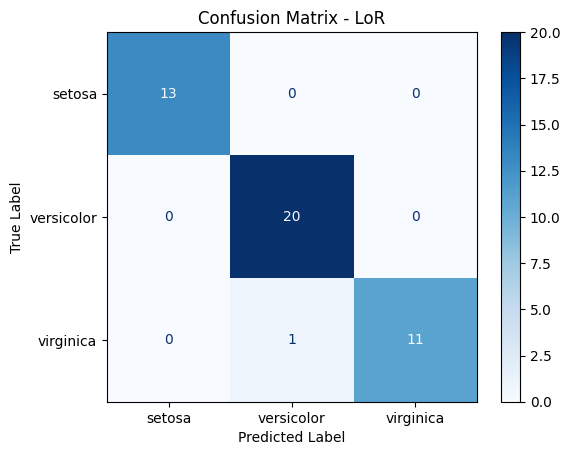

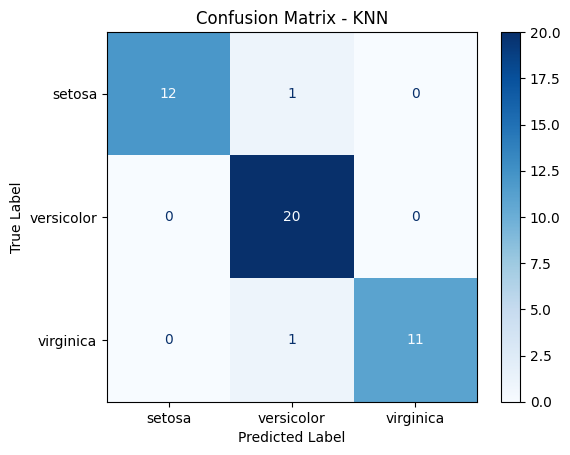

In [19]:
classification_test.classification_plot_conf(models)

In [20]:
classification_test.get_best_type()['type'].iloc[0]

'SVC'